In [20]:
import pandas as pd
import seaborn as sns

people = pd.read_excel("baseball.xlsx", 'people')

people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


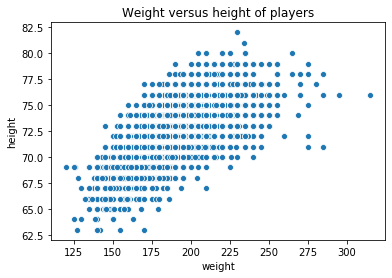

In [21]:
import matplotlib.pyplot as plt

sns_plot = sns.scatterplot(x='weight',y='height',data=people)
plt.title('Weight versus height of players')

plt.savefig('people-scatter.png')

plt.show()

In [23]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('players-report.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
people.to_excel(writer, sheet_name='data',index=False)

# Get the xlsxwriter objects from the dataframe writer object.
workbook  = writer.book
worksheet_data = writer.sheets['data']

# Add another worksheet
worksheet_chart = workbook.add_worksheet('chart')

In [24]:
# Freeze first row of the data worksheet
worksheet_data.freeze_panes(1,0)

# Now let's insert an image of our scatterplot
# into the worksheet
worksheet_chart.insert_image('A1','people-scatter.png')

# Always close the workbook!
workbook.close()
